In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings

import seaborn as sns

# STATS 315B Project: EDA
# Author: David Troxell
# 5/6/22

#Notes:
    #Not sure what the weights.csv is for. Chose to ignore
    #Only need to pay attention to Load_history.csv (i.e. the target var) and temperature_history.csv (predictors)
    #Missing Data:
        #Load_history.csv has random weeks missing at random times since they were meant to be test set. Will use different
            #test set since we can't check predicitons with current setup
        #When evaluating our training performance later, then, we can still make predictions like normal
            #but when evaluating predictions w/ RMSE (or whatever metric), we can ignore the rows with missing target data

## EDA: Predictors 

### Overall Description of Dataset and Data Types

In [2]:
#Load in predictors
tempData=pd.read_csv("data/temperature_history.csv")

tempData.head() #all rows for station_id 1, then all rows for station_id 2, etc. rather than organized by day

,station_id,year,month,day,h1,h2,h3,h4,h5,h6,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,1,2004,1,1,46,46,45,41,39,35,...,55.0,55.0,52.0,46.0,40.0,40.0,39.0,38.0,40.0,41.0
1,1,2004,1,2,43,44,46,46,47,47,...,54.0,56.0,57.0,53.0,50.0,47.0,46.0,45.0,45.0,45.0
2,1,2004,1,3,45,46,46,44,43,46,...,69.0,68.0,68.0,65.0,64.0,63.0,62.0,63.0,63.0,62.0
3,1,2004,1,4,63,62,62,62,60,60,...,71.0,72.0,71.0,68.0,67.0,67.0,65.0,64.0,65.0,64.0
4,1,2004,1,5,64,63,65,64,64,64,...,66.0,66.0,66.0,66.0,63.0,54.0,52.0,49.0,47.0,47.0


In [3]:
print(tempData.dtypes)

station_id      int64
year            int64
month           int64
day             int64
h1              int64
h2              int64
h3              int64
h4              int64
h5              int64
h6              int64
h7            float64
h8            float64
h9            float64
h10           float64
h11           float64
h12           float64
h13           float64
h14           float64
h15           float64
h16           float64
h17           float64
h18           float64
h19           float64
h20           float64
h21           float64
h22           float64
h23           float64
h24           float64
dtype: object


In [4]:
#all variables are numeric, but station_id should probably be interpreted as categorical
tempData['station_id'] = tempData['station_id'].astype('category')

#continue with overall dataset description
print(tempData.shape) #18073 rows
tempData.describe() # 1 col for station, 3 for calendar info, and 1 for each hr of day

#we see that data ranges from 2004-2008

(18073, 28)


,year,month,day,h1,h2,h3,h4,h5,h6,h7,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
count,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18073.000000,18062.000000,...,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000
mean,2005.776019,6.188071,15.723676,52.826924,52.196979,51.643225,51.135451,50.681735,50.292702,50.392260,...,66.076514,66.191452,65.648765,64.137914,61.622799,58.850072,56.660946,55.327317,54.342376,53.533994
std,1.314680,3.435162,8.796737,15.706729,15.693326,15.705607,15.711079,15.737625,15.774570,16.125607,...,17.467881,17.318609,17.200823,17.311366,17.393181,16.769876,16.078702,15.858632,15.775466,15.742130
min,2004.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,16.000000,16.000000,17.000000,16.000000,14.000000,11.000000,9.000000,7.000000,5.000000,5.000000
25%,2005.000000,3.000000,8.000000,40.000000,39.000000,39.000000,38.000000,38.000000,37.000000,37.000000,...,52.000000,52.000000,52.000000,50.000000,47.000000,45.000000,44.000000,42.000000,41.000000,41.000000
50%,2006.000000,6.000000,16.000000,54.000000,54.000000,53.000000,53.000000,52.000000,52.000000,52.000000,...,68.000000,68.000000,68.000000,66.000000,63.000000,61.000000,58.000000,57.000000,56.000000,55.000000
75%,2007.000000,9.000000,23.000000,66.000000,66.000000,65.000000,64.000000,64.000000,64.000000,64.000000,...,81.000000,81.000000,80.000000,79.000000,77.000000,73.000000,71.000000,69.000000,68.000000,67.000000
max,2008.000000,12.000000,31.000000,86.000000,85.000000,85.000000,85.000000,83.000000,82.000000,84.000000,...,103.000000,104.000000,103.000000,102.000000,99.000000,97.000000,95.000000,91.000000,92.000000,88.000000


In [5]:
print(tempData.station_id.unique()) # we see there are 11 different station ID's

[1, 2, 3, 4, 5, ..., 7, 8, 9, 10, 11]
Length: 11
Categories (11, int64): [1, 2, 3, 4, ..., 8, 9, 10, 11]


### Missing Data

In [6]:
#investigate missing data
percent_missing = tempData.isnull().sum()
missing_value_df = pd.DataFrame({'Obs_Missing': percent_missing})
missing_value_df

,Obs_Missing
station_id,0
year,0
month,0
day,0
h1,0
h2,0
h3,0
h4,0
h5,0
h6,0


In [7]:
#All data complete except that hours 7-24 have 11 missing observations
#which observations are missing?
null_data = tempData[tempData.isnull().any(axis=1)]
null_data

,station_id,year,month,day,h1,h2,h3,h4,h5,h6,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
1642,1,2008,6,30,74,74,74,74,74,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3285,2,2008,6,30,66,65,64,64,64,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4928,3,2008,6,30,77,76,76,75,75,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6571,4,2008,6,30,72,72,72,72,72,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8214,5,2008,6,30,73,74,74,73,72,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9857,6,2008,6,30,70,70,70,70,70,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11500,7,2008,6,30,74,73,72,71,71,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13143,8,2008,6,30,72,71,71,71,70,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14786,9,2008,6,30,75,72,72,69,69,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16429,10,2008,6,30,70,70,70,70,70,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#all missing data come from the same 11 rows, which pertain to last day in dataset
#for now, just remove these rows:
tempData=tempData.dropna()

### Visualizations

Text(0, 0.5, 'Temperature')

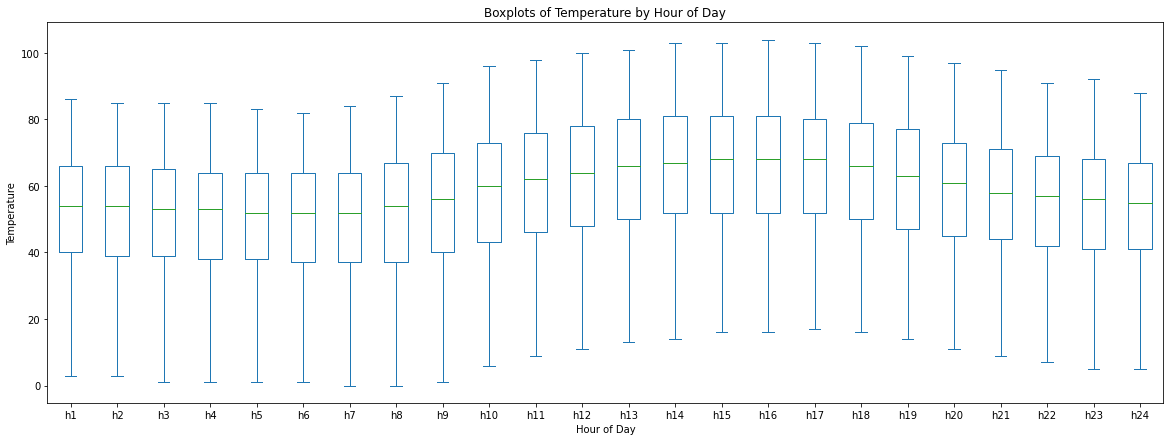

In [9]:
#now that we've investigated data types, missing data, and overall dataset descriptions, visualize daily temp
hourTempData = tempData.drop(['station_id', 'year','month','day'], axis=1)

#boxplot of all hours:
plt.rcParams["figure.figsize"] = (20,7)
ax = hourTempData.plot(kind='box', title='boxplot')
ax.set_title('Boxplots of Temperature by Hour of Day')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Temperature')

#seems that temperature across days follows a distribution one may expect

Text(0, 0.5, 'Temperature')

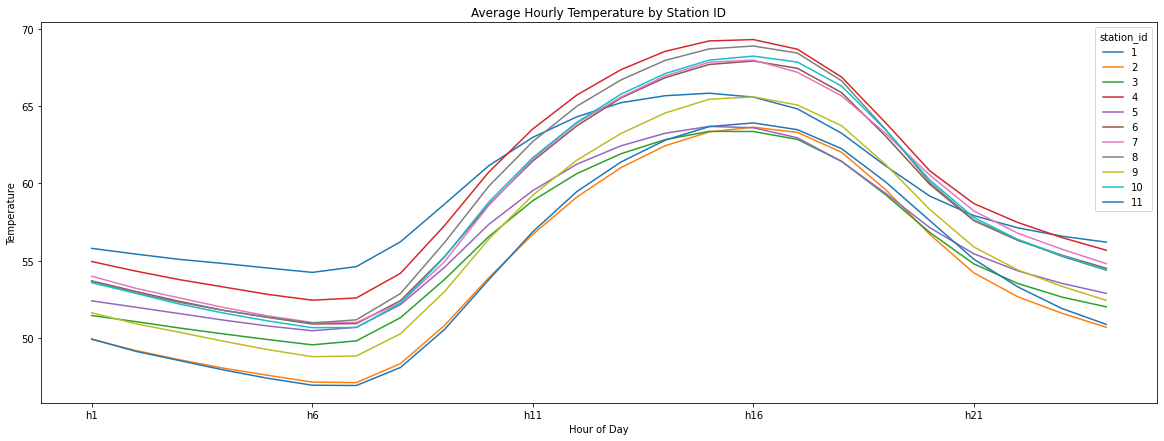

In [10]:
#What about temperatures across different stations?
hourTempData['station_id']=tempData['station_id']
AvgHourlyTempsByStation=hourTempData.groupby(['station_id']).mean()
ax=AvgHourlyTempsByStation.T.plot.line()
ax.set_title('Average Hourly Temperature by Station ID')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Temperature')

#seems that there is modest variation in temperature values by station

In [11]:
#remove last col used to make the table
tempData = tempData.iloc[: , :-1]

## EDA: Target Variable

### Overall Description of Dataset and Data Types

In [12]:
#Load in predictors
load=pd.read_csv("data/load_history.csv")

#Overall description
print(load.shape)
load.head() #all rows for station_id 1, then all rows for station_id 2, etc. rather than organized by day

(33000, 28)


,zone_id,year,month,day,h1,h2,h3,h4,h5,h6,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,1,2004,1,1,"16,853","16,450","16,517","16,873","17,064","17,727",...,"13,518","13,138","14,130","16,809","18,150","18,235","17,925","16,904","16,162","14,750"
1,1,2004,1,2,"14,155","14,038","14,019","14,489","14,920","16,072",...,"16,127","15,448","15,839","17,727","18,895","18,650","18,443","17,580","16,467","15,258"
2,1,2004,1,3,"14,439","14,272","14,109","14,081","14,775","15,491",...,"13,507","13,414","13,826","15,825","16,996","16,394","15,406","14,278","13,315","12,424"
3,1,2004,1,4,"11,273","10,415","9,943","9,859","9,881","10,248",...,"14,207","13,614","14,162","16,237","17,430","17,218","16,633","15,238","13,580","11,727"
4,1,2004,1,5,"10,750","10,321","10,107","10,065","10,419","12,101",...,"13,845","14,350","15,501","17,307","18,786","19,089","19,192","18,416","17,006","16,018"


In [13]:
print(load.dtypes)
#need to convert all to numeric except for zone id
load['zone_id']=load.zone_id.astype("category")
for i in range(4,28):
    load.iloc[:,i]= load.iloc[:,i].str.replace(",","").astype(float)

zone_id     int64
year        int64
month       int64
day         int64
h1         object
h2         object
h3         object
h4         object
h5         object
h6         object
h7         object
h8         object
h9         object
h10        object
h11        object
h12        object
h13        object
h14        object
h15        object
h16        object
h17        object
h18        object
h19        object
h20        object
h21        object
h22        object
h23        object
h24        object
dtype: object


In [14]:
load.describe()

,year,month,day,h1,h2,h3,h4,h5,h6,h7,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
count,33000.000000,33000.000000,33000.000000,31740.000000,31740.000000,31740.000000,31740.000000,31740.000000,31740.000000,31720.000000,...,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.000000,31720.00000,31720.000000,31720.000000
mean,2005.785455,6.191515,15.673939,70926.438752,68367.371078,67223.698582,67219.048488,68877.101071,73185.141682,80895.835309,...,84976.592276,85334.759079,87497.718474,91342.365006,93954.229666,93980.635530,93379.816204,90079.69442,83608.390763,76001.346122
std,1.319811,3.428231,8.811922,63336.584589,61649.650085,61079.202766,61481.199924,63292.517399,67438.821292,74502.132078,...,78671.761052,79063.510346,80617.140212,83395.463130,84927.965376,84121.809471,82949.580739,79473.26948,73336.716316,67116.737479
min,2004.000000,1.000000,1.000000,75.000000,71.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,2.000000,1.000000,0.000000,3.000000,130.000000,2.00000,2.000000,6.000000
25%,2005.000000,3.000000,8.000000,16681.500000,15675.500000,15169.750000,15004.000000,15459.000000,16658.250000,18834.250000,...,19426.500000,19510.750000,20328.000000,21849.500000,23201.000000,23544.250000,23433.750000,22806.00000,21160.000000,18569.250000
50%,2006.000000,6.000000,16.000000,57030.000000,53967.000000,52322.000000,51610.500000,52628.500000,55236.500000,61635.000000,...,59924.000000,60016.500000,61935.000000,63821.000000,65862.500000,67851.000000,68851.500000,68957.00000,66284.500000,61915.500000
75%,2007.000000,9.000000,23.000000,122824.000000,117050.000000,114253.250000,113831.500000,116663.750000,123023.000000,133503.250000,...,151530.750000,151881.250000,155543.250000,161666.250000,165413.750000,167012.500000,167473.500000,160286.75000,147741.500000,133405.000000
max,2008.000000,12.000000,31.000000,435446.000000,448987.000000,465438.000000,483916.000000,507109.000000,538705.000000,540393.000000,...,410920.000000,417029.000000,425147.000000,426805.000000,480793.000000,449788.000000,457045.000000,450044.00000,434296.000000,430548.000000


In [15]:
print(load.zone_id.unique()) # we see there are 20 different zone ID's

[1, 2, 3, 4, 5, ..., 16, 17, 18, 19, 20]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]


### Missing Data

In [16]:
#investigate missing data
percent_missing = load.isnull().sum()
missing_value_df = pd.DataFrame({'Obs_Missing': percent_missing})
missing_value_df

,Obs_Missing
zone_id,0
year,0
month,0
day,0
h1,1260
h2,1260
h3,1260
h4,1260
h5,1260
h6,1260


In [17]:
#we see some missing data for hour columns
#which observations are missing?
null_data_target = load[load.isnull().any(axis=1)]
null_data_target

#all columns have the same number of days missing

,zone_id,year,month,day,h1,h2,h3,h4,h5,h6,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
430,1,2005,3,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,1,2005,3,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,1,2005,3,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,1,2005,3,9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,1,2005,3,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,20,2008,7,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32996,20,2008,7,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32997,20,2008,7,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32998,20,2008,7,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#need to remove rows corresponding to 6/30/2008 like we did for predictors:

load.drop(load[(load['year'] == 2008) & (load['month'] == 6) & (load['day'] == 30)].index, inplace = True)
load.shape #removed the 20 rows pertaining to this day

#Note: for static models, we can just use rows where both target and predictors have no na. 
#for time series, though, we'll have to impute target somehow

(32980, 28)

### Visualizations

Text(0, 0.5, 'Load')

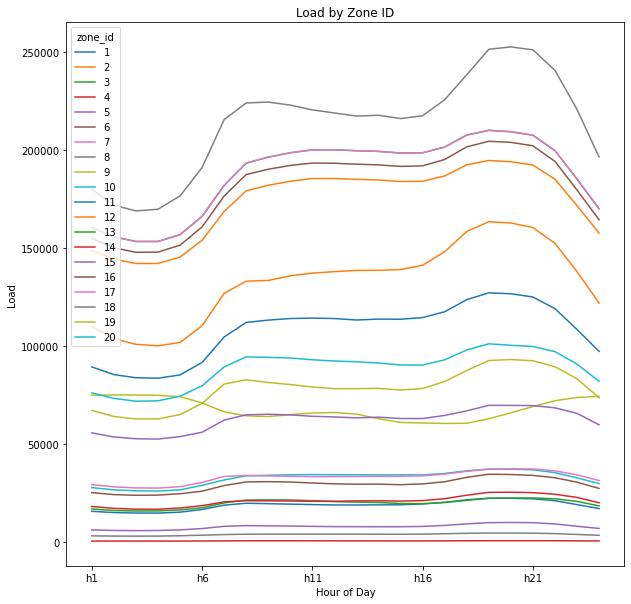

In [19]:
#now that we've investigated data types, missing data, and overall dataset descriptions, visualize demand by hour
hourLoadData = load.drop(['year','month','day'], axis=1)

AvgHourlyLoadByZone=hourLoadData.groupby(['zone_id']).mean()
plt.rcParams["figure.figsize"] = (10,10)
ax=AvgHourlyLoadByZone.T.plot.line()
ax.set_title('Load by Zone ID')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Load')

#seems like all zones follow similar pattern (except zone 9) but load varies a lot by zone and by hour

In [20]:
#Does the load depend on the day of week?
#add DOW as a column
DOW=[]
for i in range(0,load.shape[0]):
    day=load.iloc[i,3]
    month=load.iloc[i,2]
    year=load.iloc[i,1]   
    ans = datetime.date(year, month, day)
    DOW.append(ans.strftime("%A"))

Text(0.5, 1.0, 'Boxplots of Average Daily Load by Day of Week')

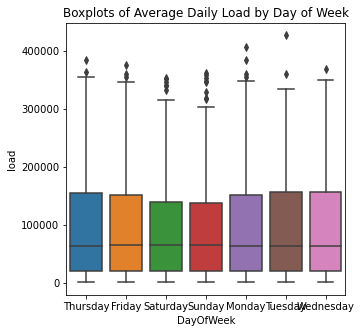

In [21]:
#boxplot of load by DOW:
hourDOWload=load.drop(['year','month','day','zone_id'], axis=1)
warnings.simplefilter(action='ignore', category=FutureWarning) #throwing warning bc of na. just ignore
d={'DayOfWeek': DOW, 'load': hourDOWload.mean(axis=1)}
df = pd.DataFrame(data=d)

#get avg daily load 
plt.rcParams["figure.figsize"] = (5,5)
ax=sns.boxplot(data=df, x='DayOfWeek', y='load')
ax.set_title("Boxplots of Average Daily Load by Day of Week")

#not much variation among day of week. Weekends slightly lower

Text(0.5, 1.0, 'Average Daily Load by Month')

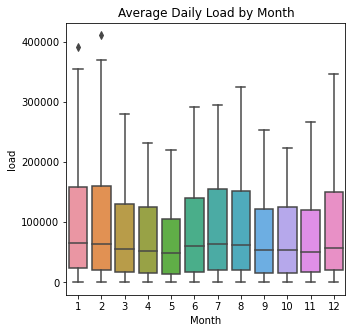

In [22]:
#boxplot of load by Month:
hourDOWload=load.drop(['year','day','zone_id'], axis=1)
warnings.simplefilter(action='ignore', category=FutureWarning) #throwing warning bc of na. just ignore
d={'Month': hourDOWload['month'], 'load': hourDOWload.mean(axis=1)}
df = pd.DataFrame(data=d)

#get avg daily load 
plt.rcParams["figure.figsize"] = (5,5)
ax=sns.boxplot(data=df, x='Month', y='load')
ax.set_title("Average Daily Load by Month")

#not much effect. slightly higher in middle of winter and middle of summer

Text(0.5, 1.0, 'Average Daily Load by Year')

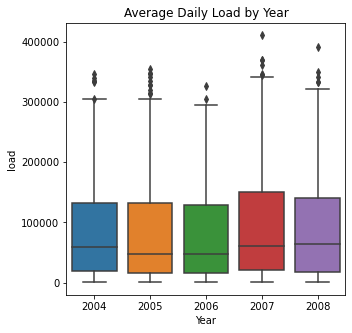

In [23]:
#boxplot of load by Year:
hourDOWload=load.drop(['month','day','zone_id'], axis=1)
warnings.simplefilter(action='ignore', category=FutureWarning) #throwing warning bc of na. just ignore
d={'Year': hourDOWload['year'], 'load': hourDOWload.mean(axis=1)}
df = pd.DataFrame(data=d)

#get avg daily load 
plt.rcParams["figure.figsize"] = (5,5)
ax=sns.boxplot(data=df, x='Year', y='load')
ax.set_title("Average Daily Load by Year")

#very little effect

## Primary Takeaways from EDA 

* Don't know which temperature stations are close to which zones
    * Since we see that temperature varies considerably by station, we may need to try and infer which stations are close to given zone by RMSE/correlation/some metric, and only use temperature readings from certain stations when predicting load for given zone
* Temperature data has no missing observations. Target variable (hourly load) has certain weeks missing
    * May be okay for static analysis/predictions (can just ignore observations with missing target), but will likely need to impute in some way for time series methods
* Load varies greatly by zone and moderately by hour. While not insignificant, relatively little load variation in day of week or month or year

In [24]:
# to-do:
    #make scatterplot of temp vs load (not urgent)
    #decide how to reshape data to form datasets for the time series methods and the static methods
        #i.e. make 24 models for the static analysis?
        #and make one time series for each zone?